# Homework 4: Intro to clustering


**Useful numpy functions:**
- `np.vstack`,`np.hstack`,`np.concatenate`
- `np.max`,`np.min`,`np.argmax`,`np.argmin`
  
**Table of Contents:**
1. K-means
2. PCA features for supervised learning

In [8]:
import matplotlib.pyplot as plt
import numpy as np

## Part 1: K-means

Let's work with the same example from lecture, but implement some of the formulas ourselves.

Ex: two Gaussian blobs

In [9]:
# Number of training events we'll sample / blob
N_tr = 100

In [10]:
# The centers of the Gaussian blobs
c1 = np.array([0,0])
c2 = np.array([2,1])

s1 = .333
s2 = .45

In [11]:
X1 = c1 + s1*np.random.randn(N_tr,2)
X2 = c2 + s2*np.random.randn(N_tr,2)

In [12]:
color1 = 'dodgerblue'
color2 = 'darkorange'
fs=20

In [13]:
X = np.vstack([X1,X2])
X.shape

(200, 2)

In [15]:
size=250
marker='X'
size=250
lw=2
alpha=.5

Text(0, 0.5, '$x_1$')

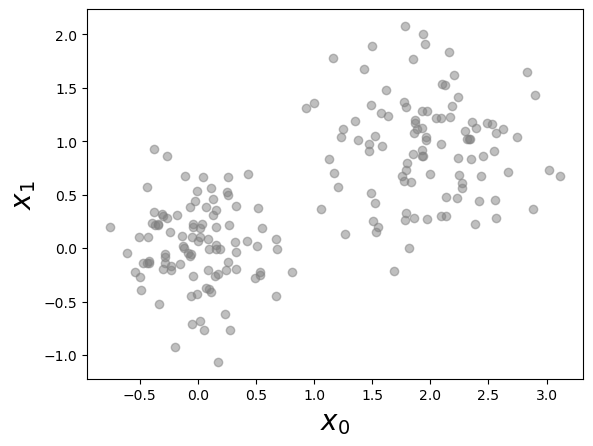

In [16]:
'''
Q1: Visualize the data
TO DO
'''
plt.scatter(*X.T,color='grey',alpha=alpha)

# # Uncomment this bit if you want to viz w/ the truth labels
# plt.scatter(*X1.T,color=color1,alpha=alpha)
# plt.scatter(*X2.T,color=color2,alpha=alpha)


plt.xlabel('$x_0$',fontsize=fs)
plt.ylabel('$x_1$',fontsize=fs)

OK -- run $K$-means!

In [17]:
K=2

idx1, idx2 = np.random.choice(X.shape[0], size=K,replace=False)

In [18]:
idx1, idx2 = (91,47)

In [19]:
m1 = X[idx1]
m2 = X[idx2]

mus = np.vstack([m1,m2])

In [20]:
colors = [color1,color2]

Text(0.5, 1.0, 'Initialization of algorithm')

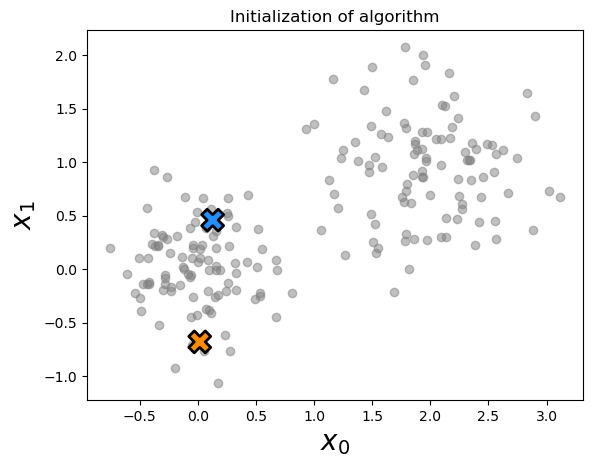

In [21]:
plt.scatter(*X.T,color='grey',alpha=alpha)

plt.scatter(*mus.T,size,marker=marker,
            linewidths=lw,edgecolors='k',
            color=colors)

plt.xlabel('$x_0$',fontsize=fs)
plt.ylabel('$x_1$',fontsize=fs)
plt.title('Initialization of algorithm')

Keep track of the clusters that each point gets assigned to.

In [22]:
dim=2

In [23]:
def updateClusters(X,mus):
    '''
    Update the cluster assignment
    
    Inputs:
    - X: input data (:, dim)
    - mus: the cluster centers (:, K, dim)
    Outputs:
    - idx: int from [0, ... K-1] of len(X.shape[0])
           for which cluster each input is assigned to
    
    '''
    
    # Infer the # of clusters and dim of the input
    K, dim = mus.shape
    assert X.shape[-1] == dim # sanity chck

    '''
    Q2/ Update the expectation step

    TO DO
    '''
    Z = X.reshape(-1,1,dim)-mus.reshape(1,K,dim)
    J = np.sum(Z**2,axis=-1)
    idx = np.argmin(J,axis=1)
    
    return idx


def updateCenters(X, idx):
    '''
    Update the cluster centers
    
    Inputs:
    - X: input data (:, dim)
    - idx: int from [0, ... K-1] of len(X.shape[0])
           for which cluster each input is assigned to
    
    Output:
    - mus: the cluster centers (:, K, dim)
    
    '''

    '''
    Q3/ TO DO
    '''
    K = np.max(idx)+1
    
    mus = np.vstack([np.mean(X[idx==i],axis=0) for i in range(K)])
    
    return mus

**Cost function**

$$\mathcal{L}(c,\mu) = \sum_{i=1}^n ||x^{(i)} - \mu_{c^{(i)}}||^2$$

In [24]:
def costFct(X,mus,idx):

    '''
    Q4/ TO DO
    '''
    
    J = 0
    for i,mu in enumerate(mus):
        J += np.sum((X[idx==i] - mu)**2)
    
    return J

In [25]:
def drawPlot(X, mus,idx, colors,  figName = ''):

    K = mus.shape[0]
    assert len(colors) == K
    
    for i, color in enumerate(colors):
        plt.scatter(*X[idx==i].T,color=color,alpha=alpha)
    
    plt.scatter(*mus.T,size,
                marker=marker,linewidths=lw,color=colors,
                edgecolors='k')

    plt.xlabel('$x_0$',fontsize=fs)
    plt.ylabel('$x_1$',fontsize=fs)

    if figName:
        plt.savefig(figName,bbox_inches='tight')

    plt.show()

In [26]:
Ls = []

In [30]:
figDir='figures'

In [32]:
%%bash
mkdir figures

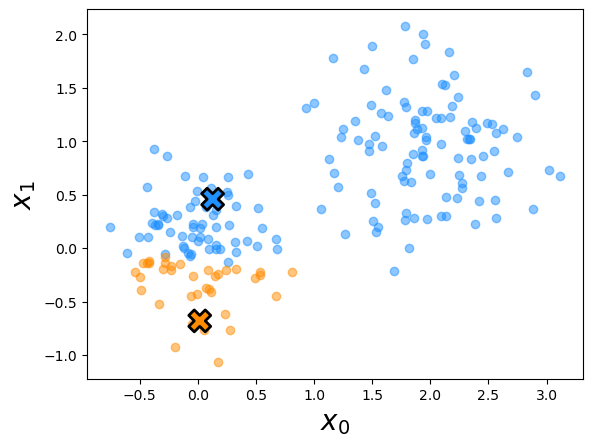

L = 432.7497443698345


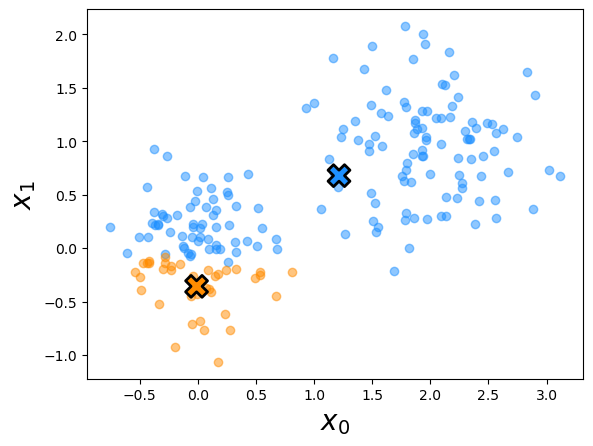

L = 228.2679054890113


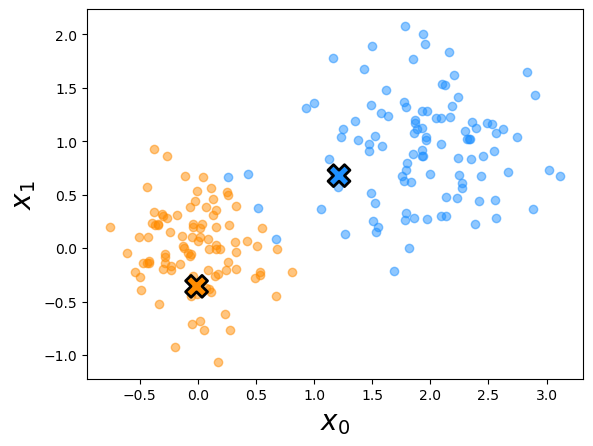

L = 145.89998896820313


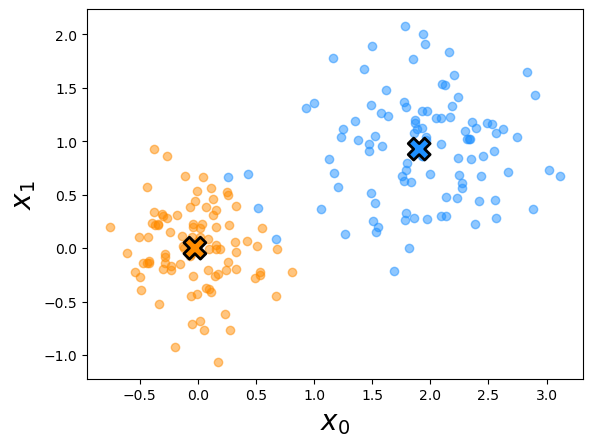

L = 77.3097555048993


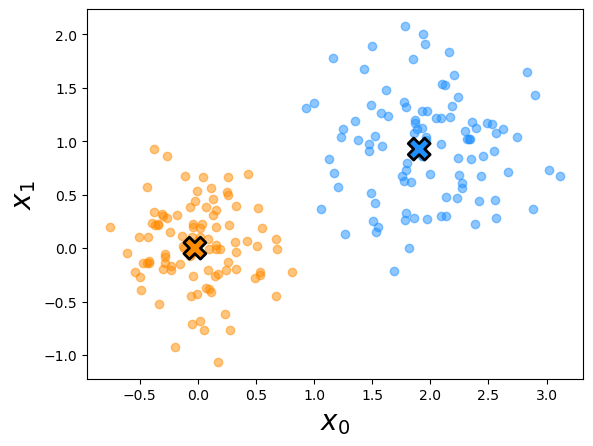

L = 70.00242494448422


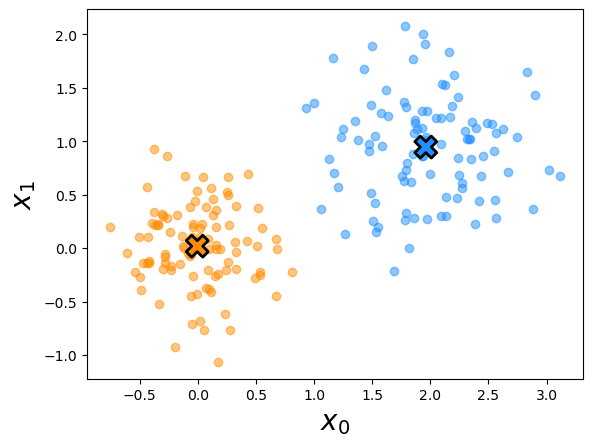

L = 69.56821703536352


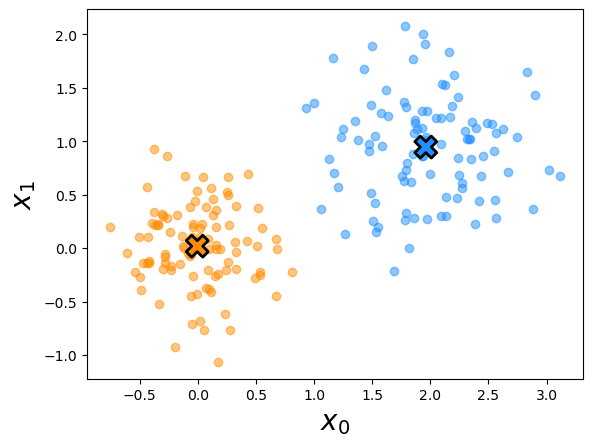

L = 69.56821703536352


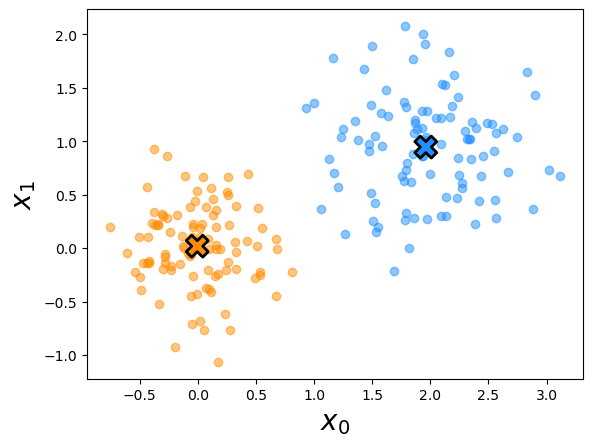

L = 69.56821703536352


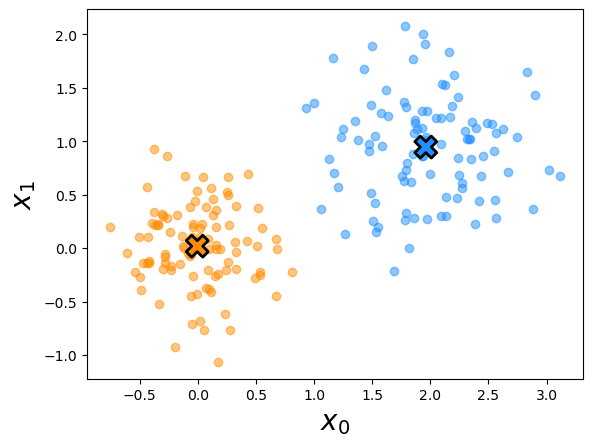

L = 69.56821703536352


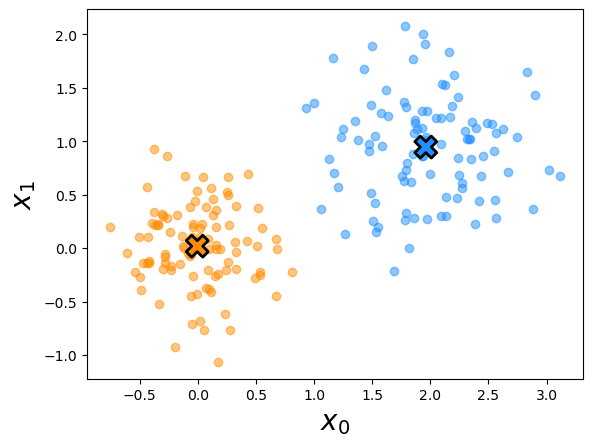

L = 69.56821703536352


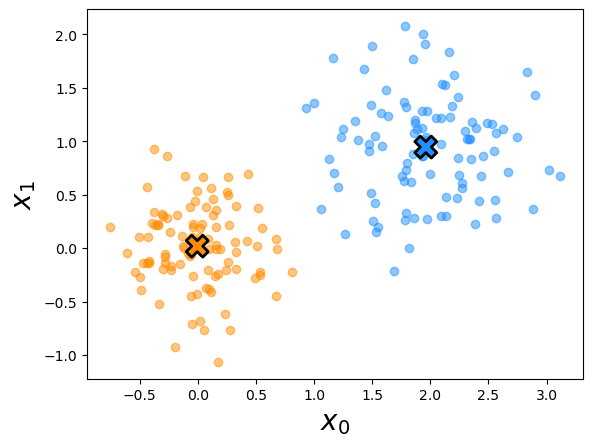

L = 69.56821703536352


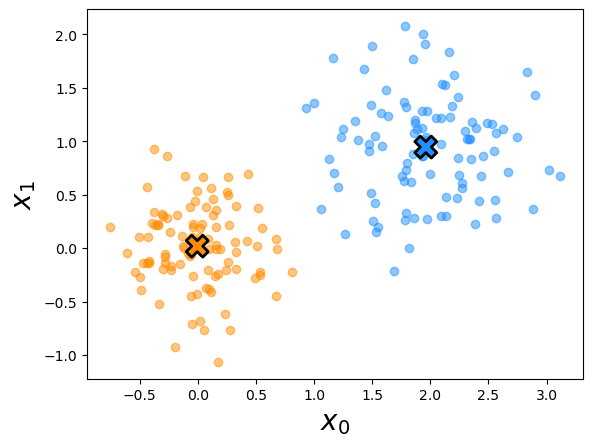

L = 69.56821703536352


In [33]:
# Run your training loop!!

for i in range(0,6):
    
    # Update clusters    
    idx = updateClusters(X,mus)
    drawPlot(X,mus,idx,colors,figName=f'{figDir}/start_{i}a.pdf')
    
    L = costFct(X,mus,idx)
    Ls.append(L)
    print(f'L = {L}')
    
    # Update means
    mus =  updateCenters(X, idx)
    drawPlot(X,mus,idx,colors,figName=f'{figDir}/start_{i}b.pdf')
   
    L = costFct(X,mus,idx)
    Ls.append(L)
    print(f'L = {L}')

In [28]:
fs

20

<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
/var/folders/5j/ynfw2g6n2cgdwgp6xdh3byn00000gp/T/ipykernel_22080/3207016368.py:8: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$\mathcal{L}$',fontsize=40,rotation=0,labelpad=20,va='top',y=.9)


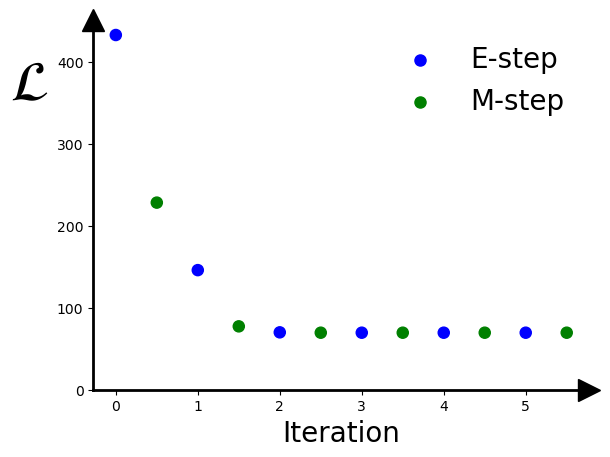

In [34]:
plt.scatter(np.arange(len(Ls))/2,Ls,64,
            color=['b','g']*(len(Ls)//2))

for l,c in zip(['E','M'],['b','g']):
    plt.scatter([],[],64,label=f'{l}-step',color=c)

plt.xlabel('Iteration',fontsize=fs)
plt.ylabel('$\mathcal{L}$',fontsize=40,rotation=0,labelpad=20,va='top',y=.9)
plt.legend(fontsize=fs,frameon=False)

ax = plt.gca()
for loc in ['right','top']:
    ax.spines[loc].set_visible(False)

ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

xlim = plt.xlim()
_,ymax = plt.ylim()

ax.plot((xlim[1]), (0), ls="", marker=">", 
    ms=16, color="k", clip_on=False)

ax.plot((xlim[0]), (ymax), ls="", marker="^", 
    ms=16, color="k", clip_on=False)

plt.xlim(xlim)
plt.ylim(0,ymax)
plt.savefig(f'{figDir}/k2_loss.pdf',bbox_inches='tight')


In [35]:
Ls

[np.float64(432.7497443698345),
 np.float64(228.2679054890113),
 np.float64(145.89998896820313),
 np.float64(77.3097555048993),
 np.float64(70.00242494448422),
 np.float64(69.56821703536352),
 np.float64(69.56821703536352),
 np.float64(69.56821703536352),
 np.float64(69.56821703536352),
 np.float64(69.56821703536352),
 np.float64(69.56821703536352),
 np.float64(69.56821703536352)]

**TO DO:** Rinse and repeat for different number of modes.

In [36]:
colors_K = ['dodgerblue','darkorange','limegreen','crimson','mediumpurple']

Running K=1
  L=305.847489452678 (1 iter)


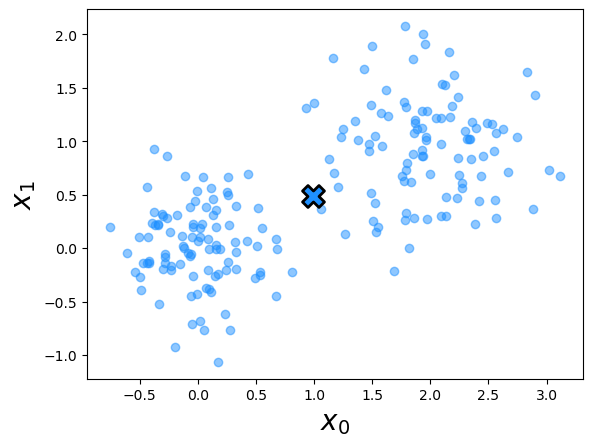

Running K=2
  L=69.56821703536352 (3 iter)


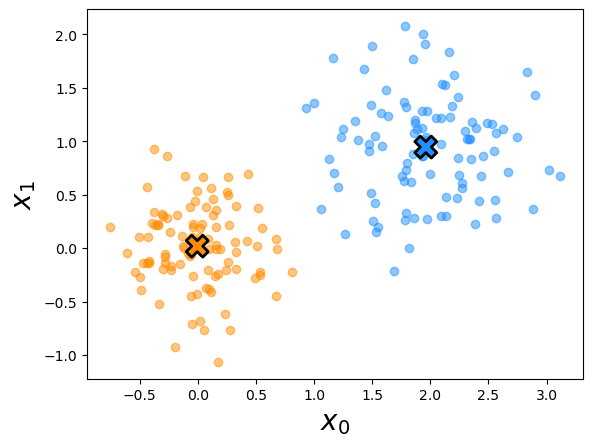

Running K=3
  L=60.85453654126127 (6 iter)


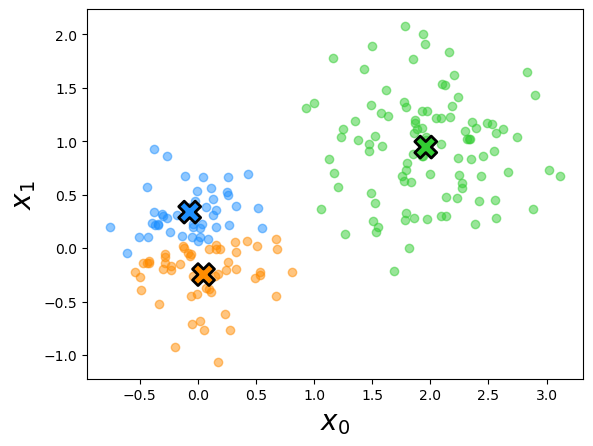

Running K=4
  L=46.20503625787593 (7 iter)


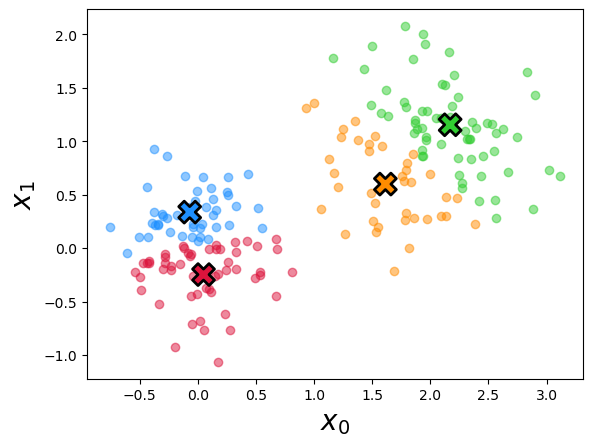

Running K=5
  L=39.903839625733504 (10 iter)


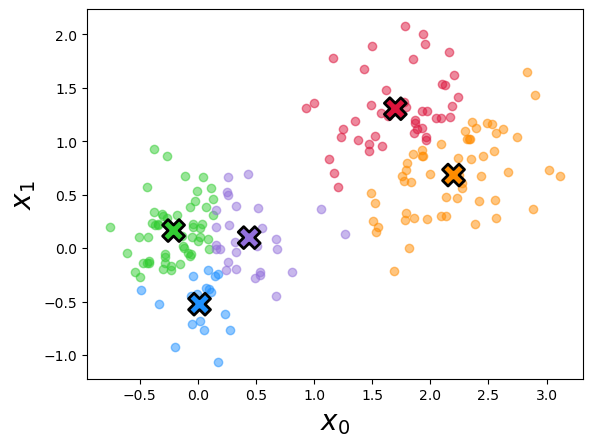

In [37]:
LossPerK = []

for K in range(1,6):
    
    print(f'Running K={K}')
    
    # Initialization
    indices = np.random.choice(X.shape[0], size=K,replace=False)
    mus = np.vstack([X[ii] for ii in indices])
    idx = updateClusters(X,mus)

    L0 = costFct(X,mus,idx)

    for i in range(100):

        # M-step
        mus =  updateCenters(X, idx)

        # E-step
        idx = updateClusters(X,mus)

        L = costFct(X,mus,idx)

        if L == L0:
            break

        L0 = L
    
    LossPerK.append(L)
    print(f'  L={L} ({i} iter)')
    
    drawPlot(X,mus,idx,colors_K[:K],figName=f'{figDir}/K{K}.pdf')


<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
/var/folders/5j/ynfw2g6n2cgdwgp6xdh3byn00000gp/T/ipykernel_22080/3113638129.py:5: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$\mathcal{L}$',fontsize=40,rotation=0,labelpad=20,va='top',y=.9)


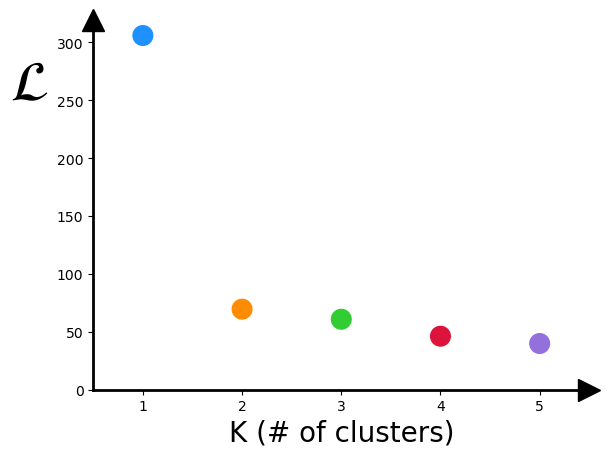

In [38]:
plt.scatter(np.arange(1,6),LossPerK,200,
            color=colors_K)

plt.xlabel('K (# of clusters)',fontsize=fs)
plt.ylabel('$\mathcal{L}$',fontsize=40,rotation=0,labelpad=20,va='top',y=.9)

ax = plt.gca()
for loc in ['right','top']:
    ax.spines[loc].set_visible(False)

ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

xlim = [0.5,5.5] #plt.xlim()
_,ymax = plt.ylim()

ax.plot((xlim[1]), (0), ls="", marker=">", 
    ms=16, color="k", clip_on=False)

ax.plot((xlim[0]), (ymax), ls="", marker="^", 
    ms=16, color="k", clip_on=False)

plt.xlim(xlim)
plt.ylim(0,ymax)
plt.savefig(f'{figDir}/loss_varyK.pdf',bbox_inches='tight')


### Code for the class questions

Below was the code for our in class questions

In [39]:
# The centers of the Gaussian blobs
c1 = np.array([0,0])
c2 = np.array([2,1])

s1 = .333
s2 = .45

X1 = c1 + s1*np.random.randn(N_tr,2)
X2 = c2 + s2*np.random.randn(N_tr,2)

In [40]:
Xs = []

for c, s in zip([(0,0),(0,2),(-3,1),(1,-2)],[.333,.45,.6,.4]):
    
    Xi = np.array(c) + s * np.random.randn(N_tr,2)
    Xs.append(Xi)

X = np.vstack(Xs)

Text(0, 0.5, '$x_1$')

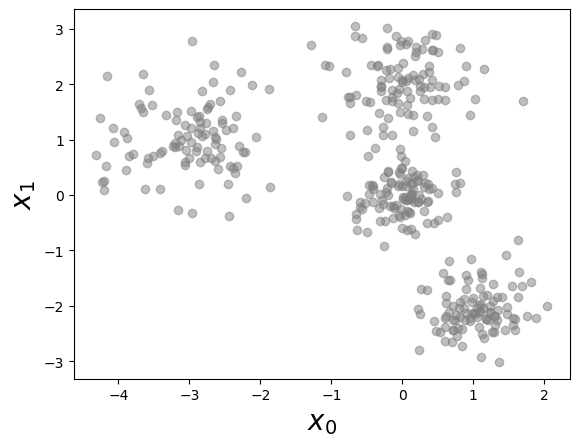

In [41]:
plt.scatter(*X.T,color='grey',alpha=alpha)

plt.xlabel('$x_0$',fontsize=fs)
plt.ylabel('$x_1$',fontsize=fs)

# plt.savefig('figures/Unsup/Kmeans/fourBlobs.pdf',bbox_inches='tight')

In [42]:
colors_K = ['dodgerblue','darkorange','limegreen','crimson','mediumpurple',
            'hotpink','mediumturquoise' 
           ]

Running K=1
  L=2007.7038843767255 (1 iter)


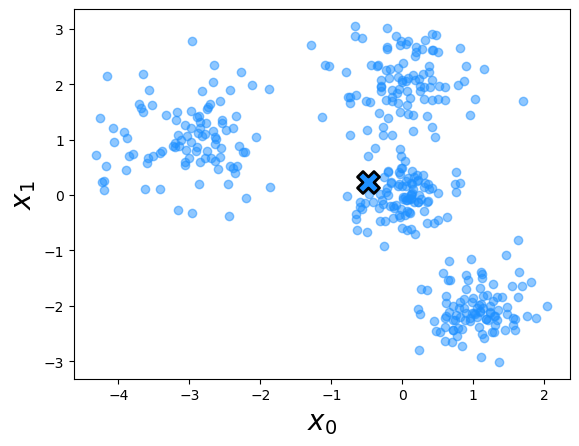

Running K=2
  L=941.8733600107939 (24 iter)


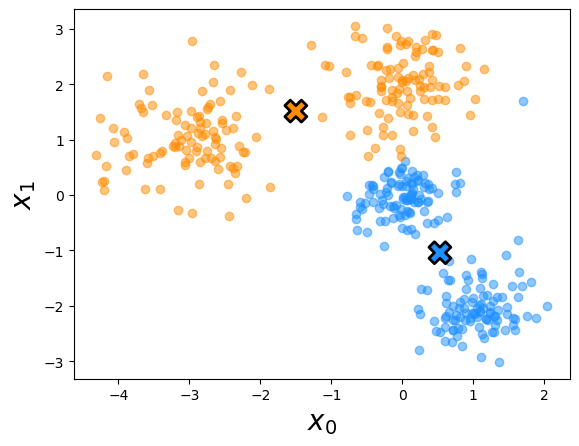

Running K=3
  L=428.94810959703983 (6 iter)


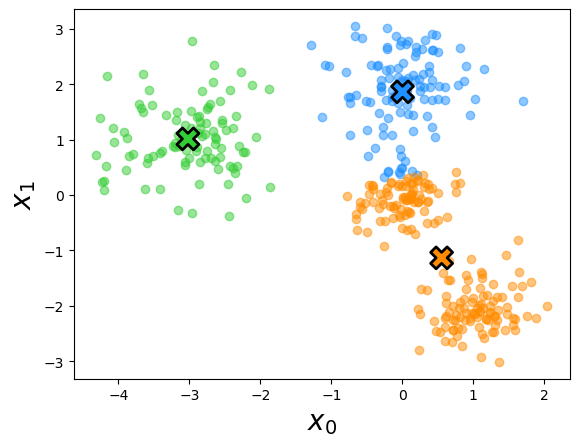

Running K=4
  L=173.8587825567497 (5 iter)


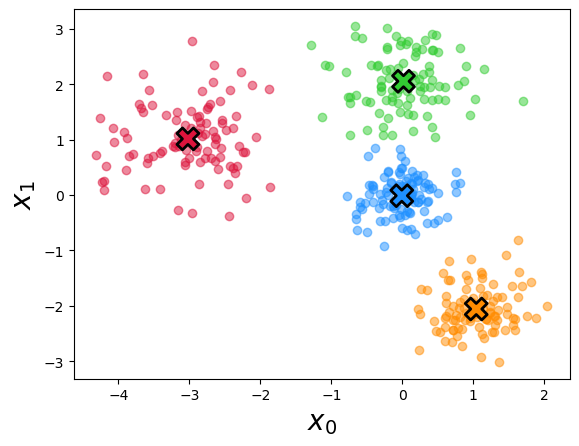

Running K=5
  L=163.48087625526145 (10 iter)


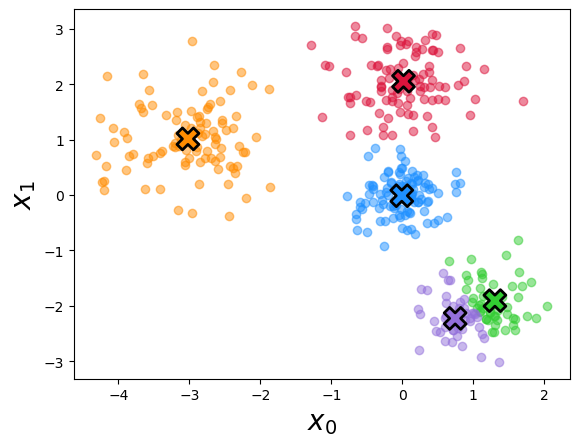

Running K=6
  L=157.0563325144423 (12 iter)


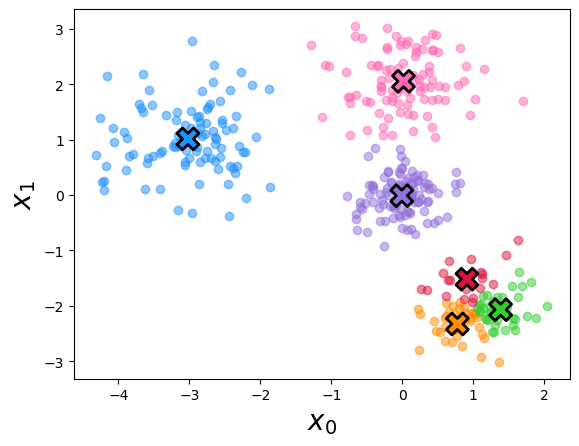

Running K=7
  L=122.90227427901388 (7 iter)


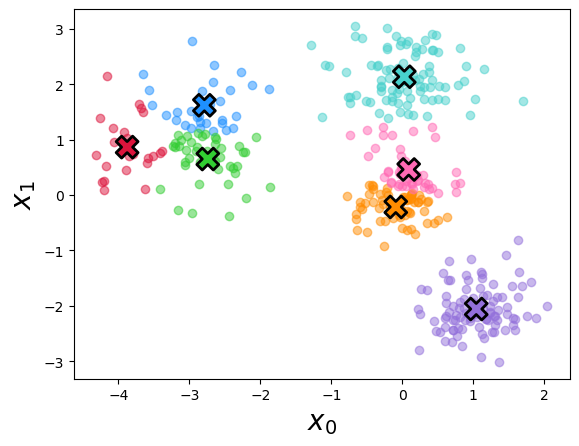

In [43]:
LossPerK = []

for K in range(1,8):
    
    print(f'Running K={K}')
    
    # Initialization
    indices = np.random.choice(X.shape[0], size=K,replace=False)
    mus = np.vstack([X[ii] for ii in indices])
    idx = updateClusters(X,mus)

    L0 = costFct(X,mus,idx)

    for i in range(100):

        # M-step
        mus =  updateCenters(X, idx)

        # E-step
        idx = updateClusters(X,mus)

        L = costFct(X,mus,idx)

        if L == L0:
            break

        L0 = L
    
    LossPerK.append(L)
    print(f'  L={L} ({i} iter)')
    
    drawPlot(X,mus,idx,colors_K[:K],figName=f'{figDir}/fourBlobs_K{K}.pdf')


<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
/var/folders/5j/ynfw2g6n2cgdwgp6xdh3byn00000gp/T/ipykernel_22080/2955175219.py:5: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$\mathcal{L}$',fontsize=40,rotation=0,labelpad=20,va='top',y=.9)


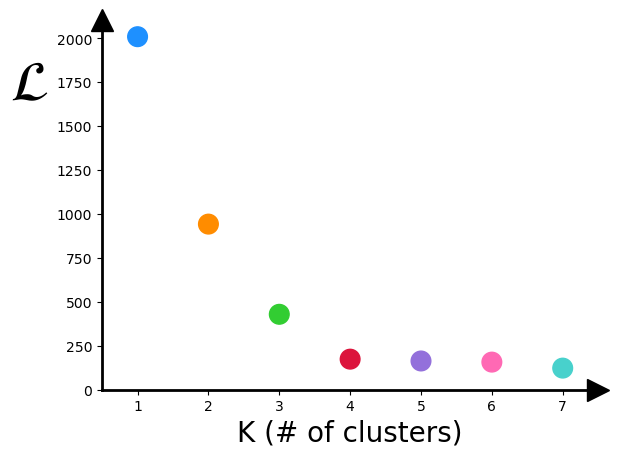

In [44]:
plt.scatter(np.arange(1,8),LossPerK,200,
            color=colors_K)

plt.xlabel('K (# of clusters)',fontsize=fs)
plt.ylabel('$\mathcal{L}$',fontsize=40,rotation=0,labelpad=20,va='top',y=.9)

ax = plt.gca()
for loc in ['right','top']:
    ax.spines[loc].set_visible(False)

ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

xlim = [0.5,7.5] 
_,ymax = plt.ylim()

ax.plot((xlim[1]), (0), ls="", marker=">", 
    ms=16, color="k", clip_on=False)

ax.plot((xlim[0]), (ymax), ls="", marker="^", 
    ms=16, color="k", clip_on=False)

plt.xlim(xlim)
plt.ylim(0,ymax)
plt.savefig(f'{figDir}/fourBlobs_loss.pdf',bbox_inches='tight')


## 2. PCA + NN: Learning useful features


- Take your top 49 PCA features (from the thurs tutorial), and feed them into a linear model with `Softmax` output layer
    - Fit the weights of the linear layer by gradient descent
    - How does this compare with the linear + `Softmax` model you built in HW 2 (in terms of accuracy)
- Try using a NN w/ multi-class output instead?
    - Are the PCA features helpful for training the NN, or can the NN directly use the low level features?



In [52]:
import scipy
import torch
from torch import nn
from torch.optim import Adam

In [53]:
# Load in the data
from numpy import genfromtxt
mnist_train = genfromtxt('../data/MNIST_CSV/mnist_train.csv', delimiter=',')
y = mnist_train[:,0]
X = mnist_train[:,1:]

print('X',X.shape)
print('y',y.shape)

X (60000, 784)
y (60000,)


In [54]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [55]:
N,d = X.shape

mean = np.average(X, axis=0)
X = X - mean

In [56]:
# Fit PCA
covX = X.T @ X / (N-1)
u, V = scipy.linalg.eigh(covX)
u = u[::-1]
V = V[:,::-1]

In [75]:
# remember the u are the eigen-values sorted from largest to smallest, 
# so the leading ones correspond to the most important eigenvectors
u[:10]

array([332724.66744657, 243283.9390705 , 211507.36705827, 184776.38586219,
       166926.83131066, 147844.96167533, 112178.20271178,  98874.42962709,
        94696.24905304,  80809.82453195])

In [57]:
u.shape

(784,)

In [58]:
V.shape

(784, 784)

In [59]:
V.shape

(784, 784)

(array([2.30000e+01, 3.40000e+01, 1.16000e+02, 6.60000e+02, 4.18993e+05,
        1.94022e+05, 6.29000e+02, 1.08000e+02, 3.10000e+01, 4.00000e+01]),
 array([-9.99371178e-01, -7.99434060e-01, -5.99496943e-01, -3.99559825e-01,
        -1.99622707e-01,  3.14410856e-04,  2.00251529e-01,  4.00188647e-01,
         6.00125764e-01,  8.00062882e-01,  1.00000000e+00]),
 <BarContainer object of 10 artists>)

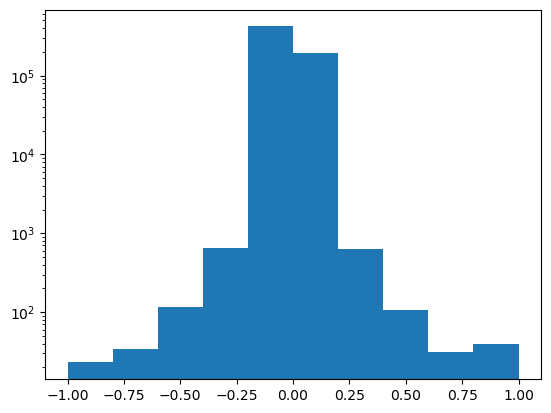

In [73]:
plt.hist(V.flatten(),log=True)

**Nb:** This is a very sparse matrix!

In [76]:
V_49 =  V[:,:49]

In [82]:
X_49 = X @ V_49

In [83]:
X.shape

(60000, 784)

In [86]:
# Train test split
idx_all = np.arange(N)
np.random.shuffle(idx_all)

nTrain = len(idx_all) * 8 // 10
nVal = len(idx_all) * 9 // 10
idx_tr  = idx_all[:nTrain]
idx_val = idx_all[nTrain:nVal]
idx_te  = idx_all[nVal:]

X_tr = torch.FloatTensor(X_49[idx_tr]) #.reshape(-1,49)
y_tr = torch.LongTensor(y[idx_tr])

X_val = torch.FloatTensor(X_49[idx_val]) #.reshape(-1,49)
y_val = torch.LongTensor(y[idx_val])


X_te  = torch.FloatTensor(X_49[idx_te]) #.reshape(-1,49)
y_te = torch.LongTensor(y[idx_te])

In [144]:
f = nn.Sequential(nn.Linear(49,10), nn.Softmax())

In [145]:
# check desired output
f(X_tr).shape

torch.Size([48000, 10])

^^ great, 10d output, looks good

In [146]:
'''
Train the model
'''

losses = {
    'train':[],
    'val': []
}
opt = torch.optim.Adam(f.parameters(), lr=0.1)


for i in range(1000):
    
    opt.zero_grad()  
    f.train() 
    
    y_pred=f(X_tr)
    loss = nn.CrossEntropyLoss()(y_pred, y_tr)
    loss.backward() 
    opt.step() 
    losses['train'].append(loss.item())

    
    # Also monitor the val loss
    f.eval()
    with torch.no_grad(): # no need to calc grad for val bit
        y_pred=f(X_val)
        loss = nn.CrossEntropyLoss()(y_pred, y_val)
        losses['val'].append(loss.item())
    


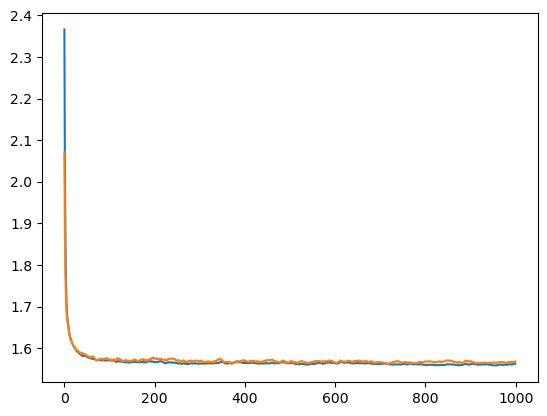

In [147]:
plt.plot(losses['train'],label='train')
plt.plot(losses['val'],label='val')

In [148]:
# Evaluate the perf on the test set

f.eval()
with torch.no_grad(): # no need to calc grad for val bit
    y_pred=f(X_te)
    
pred = torch.argmax(y_pred,dim=1)

In [149]:
acc = torch.mean((pred==y_te).float())
print(f'Acc is {acc}')

Acc is 0.893833339214325


For me, slightly better performance with the 49 PCA features instead of the mean average trick for downsampling the features in HW2 (87% HW 2 and 89% here).

PCA is a linear model to learn the dimensionality reduction, whereas a NN is a way to cleverly learn higher dim features on the manifold.

**Next week:** As networks get _deeper_ we'll get a more clever way to automatically learn features :)